In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score , f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [43]:
df = pd.read_csv('titanic_full.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
df.shape

(891, 12)

In [47]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [48]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [49]:
df['Embarked'].mode()[0]

'S'

In [50]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

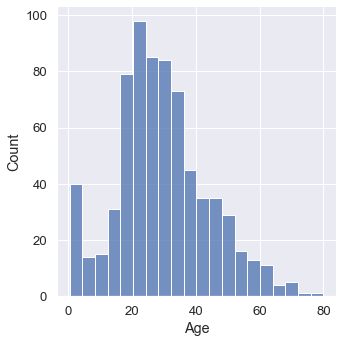

In [51]:
sns.displot(df['Age'])

<AxesSubplot:xlabel='Age'>

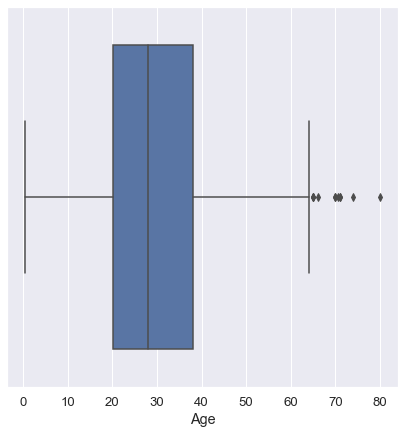

In [52]:
sns.boxplot(df['Age'])

In [53]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [54]:
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [55]:
df.isnull().values.any()

False

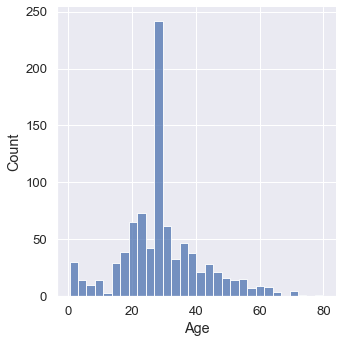

In [56]:
sns.displot(df['Age'])

<AxesSubplot:xlabel='Age'>

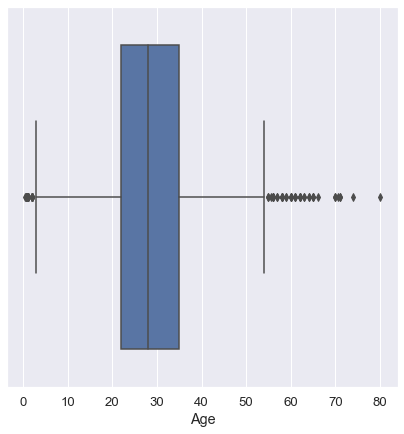

In [57]:
sns.boxplot(df['Age'])

In [58]:
df[df['Age']<1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
78,1,2,male,0.83,0,2,29.0000,S
305,1,1,male,0.92,1,2,151.5500,S
469,1,3,female,0.75,2,1,19.2583,C
644,1,3,female,0.75,2,1,19.2583,C
755,1,2,male,0.67,1,1,14.5000,S
803,1,3,male,0.42,0,1,8.5167,C
831,1,2,male,0.83,1,1,18.7500,S


In [59]:
df[df['Age']>55]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
11,1,1,female,58.0,0,0,26.5500,S
33,0,2,male,66.0,0,0,10.5000,S
54,0,1,male,65.0,0,1,61.9792,C
94,0,3,male,59.0,0,0,7.2500,S
96,0,1,male,71.0,0,0,34.6542,C
116,0,3,male,70.5,0,0,7.7500,Q
152,0,3,male,55.5,0,0,8.0500,S
170,0,1,male,61.0,0,0,33.5000,S
174,0,1,male,56.0,0,0,30.6958,C
195,1,1,female,58.0,0,0,146.5208,C


----------------------------------------------------------------------------------------------------
0    549
1    342
Name: Survived, dtype: int64


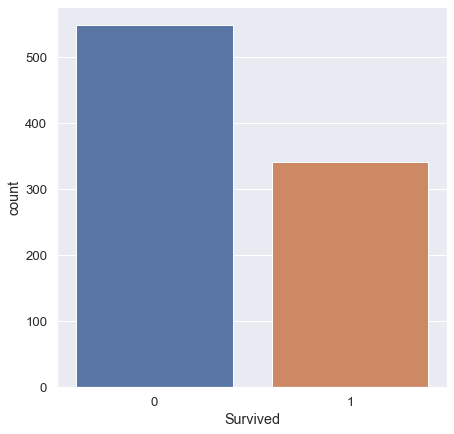

----------------------------------------------------------------------------------------------------
3    491
1    216
2    184
Name: Pclass, dtype: int64


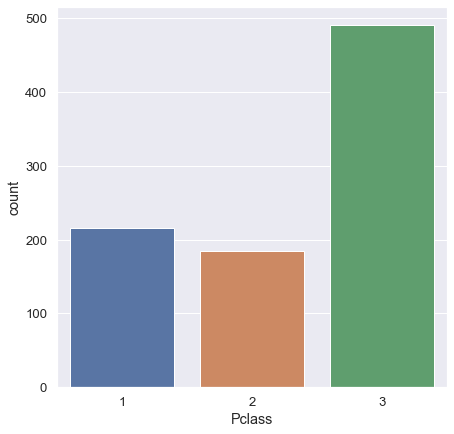

----------------------------------------------------------------------------------------------------
male      577
female    314
Name: Sex, dtype: int64


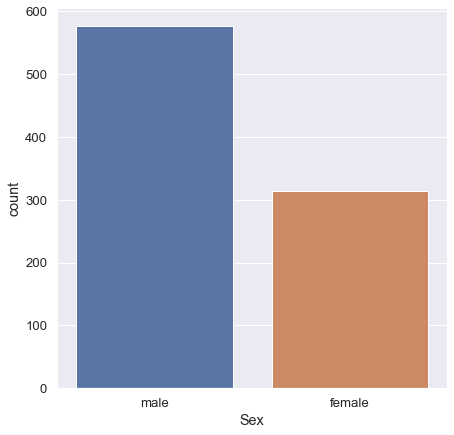

----------------------------------------------------------------------------------------------------
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


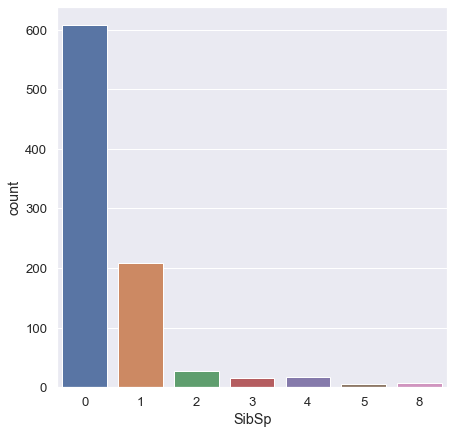

----------------------------------------------------------------------------------------------------
0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


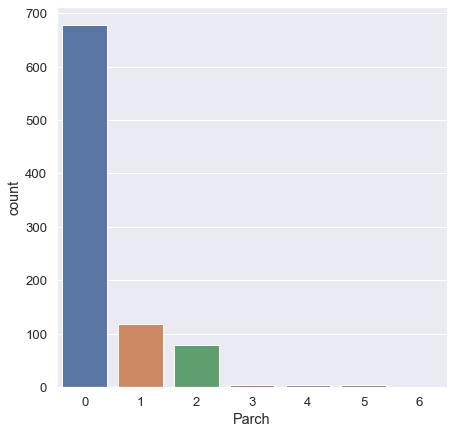

----------------------------------------------------------------------------------------------------
S    646
C    168
Q     77
Name: Embarked, dtype: int64


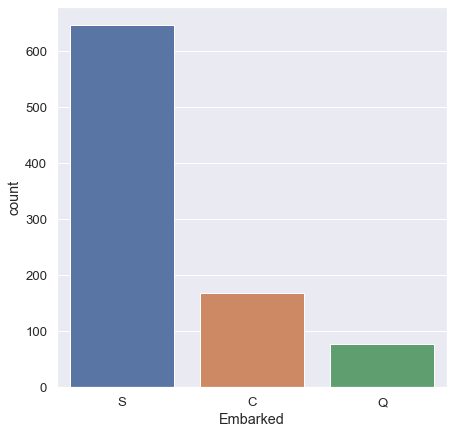

In [60]:
for col in df[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked',]]:
    print('-'*100)
    print(df[col].value_counts())
    sns.countplot(df[col])
    plt.show()

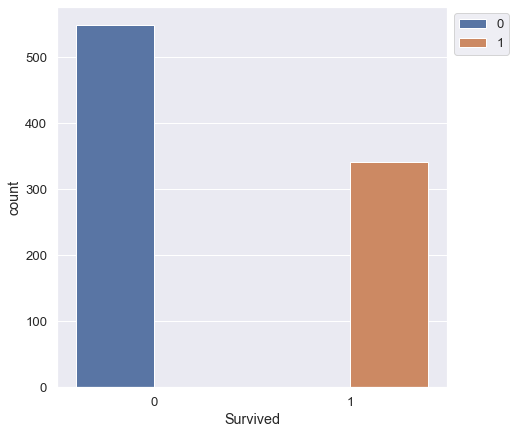

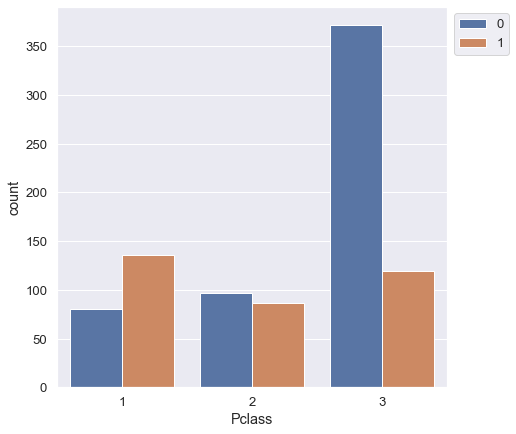

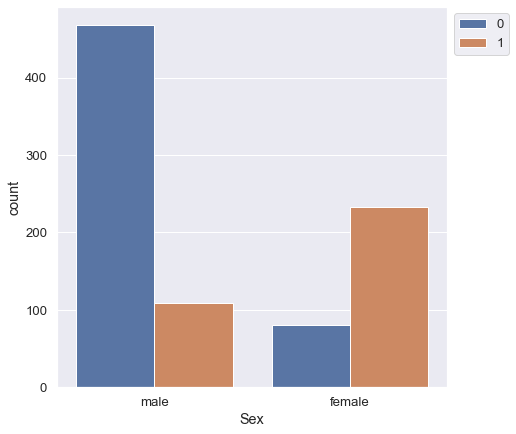

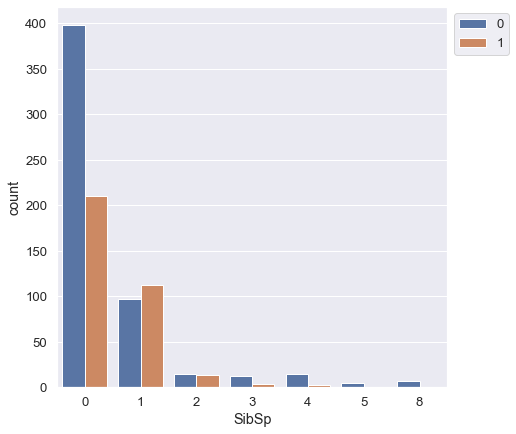

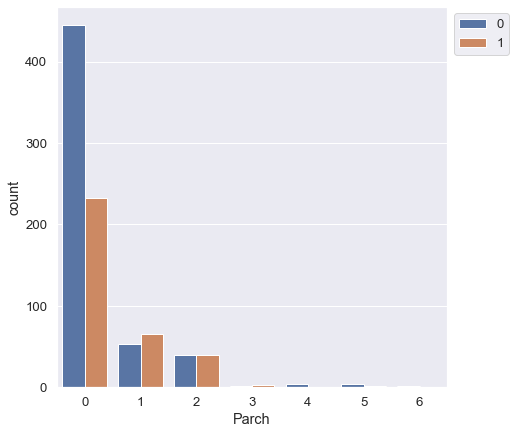

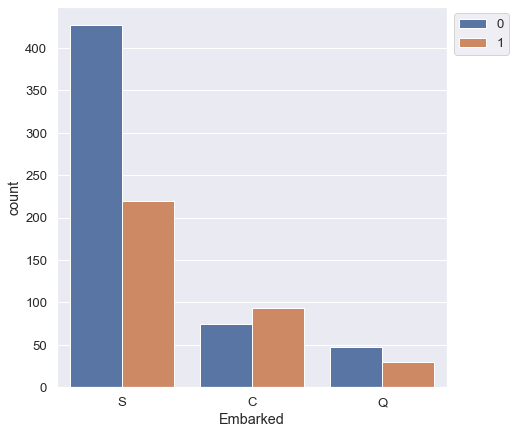

In [66]:
for col in df[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked',]]:
    sns.countplot(df[col], hue=df['Survived'])
    plt.legend(bbox_to_anchor=(1,1), loc=(2))
    plt.show()

<AxesSubplot:xlabel='Survived', ylabel='Age'>

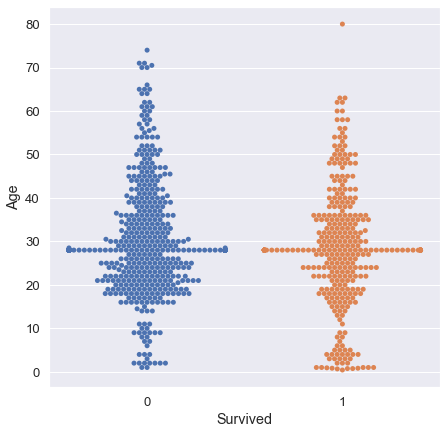

In [67]:
sns.swarmplot(y=df['Age'], x=df['Survived'])

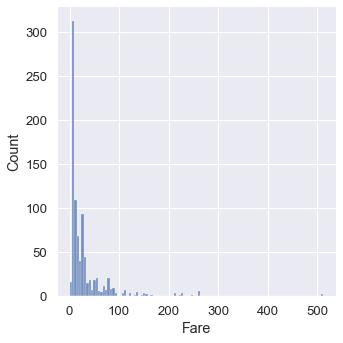

In [68]:
sns.displot(df['Fare'])

<AxesSubplot:xlabel='Fare'>

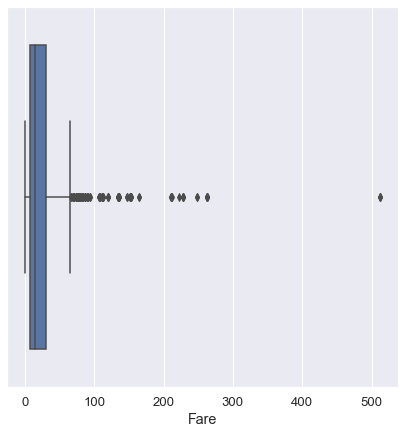

In [69]:
sns.boxplot(df['Fare'])

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

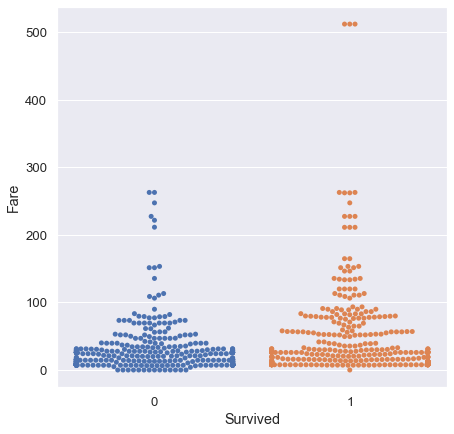

In [70]:
sns.swarmplot(y=df['Fare'], x=df['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

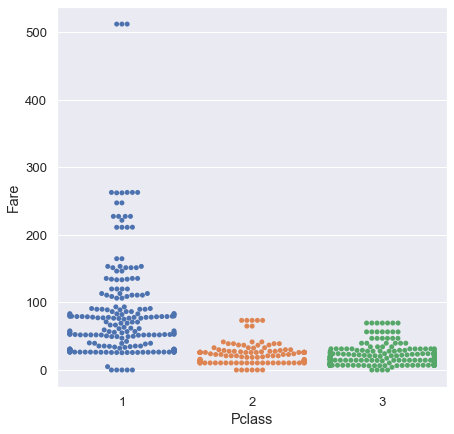

In [71]:
sns.swarmplot(y=df['Fare'], x=df['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

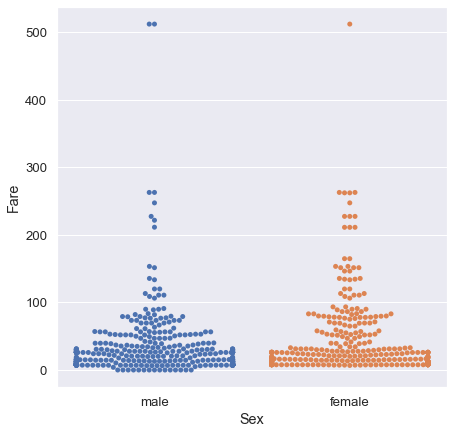

In [73]:
sns.swarmplot(y=df['Fare'], x=df['Sex'])

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

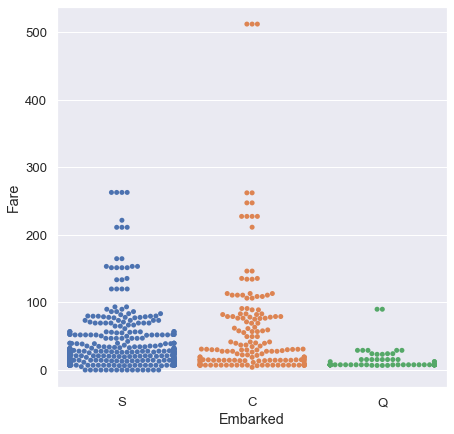

In [74]:
sns.swarmplot(y=df['Fare'], x=df['Embarked'])

In [33]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,People
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [75]:
le = LabelEncoder()
for col in df[['Sex', 'Embarked']]:
    df[col] = le.fit_transform(df[col])

In [76]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


<AxesSubplot:>

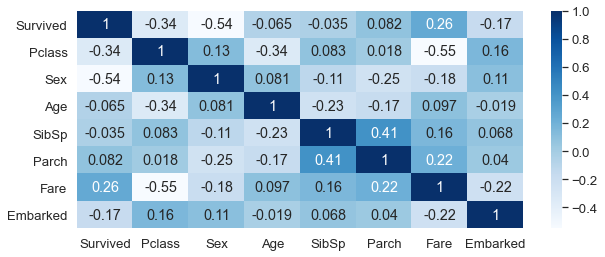

In [77]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [78]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [80]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [81]:
models = {
    "LOR": LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    'Naive': GaussianNB(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'XGB': XGBClassifier(),
    'SVM': SVC()
}

In [82]:
for name, model in models.items():
    print(f'Using model: {name}')
    
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    
    y_pred = model.predict(x_test)
    print(f'Test Score: {accuracy_score(y_test, y_pred)}')  
    print(f'F1_Score: {f1_score(y_test, y_pred)}')  
    print('-'*30)

Using model: LOR
Training Score: 0.800561797752809
Test Score: 0.8044692737430168
F1_Score: 0.7552447552447553
------------------------------
Using model: KNN
Training Score: 0.8665730337078652
Test Score: 0.8044692737430168
F1_Score: 0.7552447552447553
------------------------------
Using model: Naive
Training Score: 0.7991573033707865
Test Score: 0.776536312849162
F1_Score: 0.7402597402597403
------------------------------
Using model: DT
Training Score: 0.9789325842696629
Test Score: 0.7821229050279329
F1_Score: 0.7450980392156862
------------------------------
Using model: RF
Training Score: 0.9789325842696629
Test Score: 0.8212290502793296
F1_Score: 0.7808219178082192
------------------------------
Using model: XGB
Training Score: 0.9620786516853933
Test Score: 0.7932960893854749
F1_Score: 0.7516778523489932
------------------------------
Using model: SVM
Training Score: 0.8441011235955056
Test Score: 0.8156424581005587
F1_Score: 0.762589928057554
------------------------------


In [129]:
model = RandomForestClassifier(n_estimators=200, max_depth=9)
model.fit(x_train, y_train)
print(f'Training Score: {model.score(x_train, y_train)}')

y_pred = model.predict(x_test)
print(f'Test Score: {accuracy_score(y_test, y_pred)}')  
print(f'F1_Score: {f1_score(y_test, y_pred)}')  
print('-'*30)

Training Score: 0.925561797752809
Test Score: 0.8379888268156425
F1_Score: 0.7883211678832117
------------------------------
